In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')

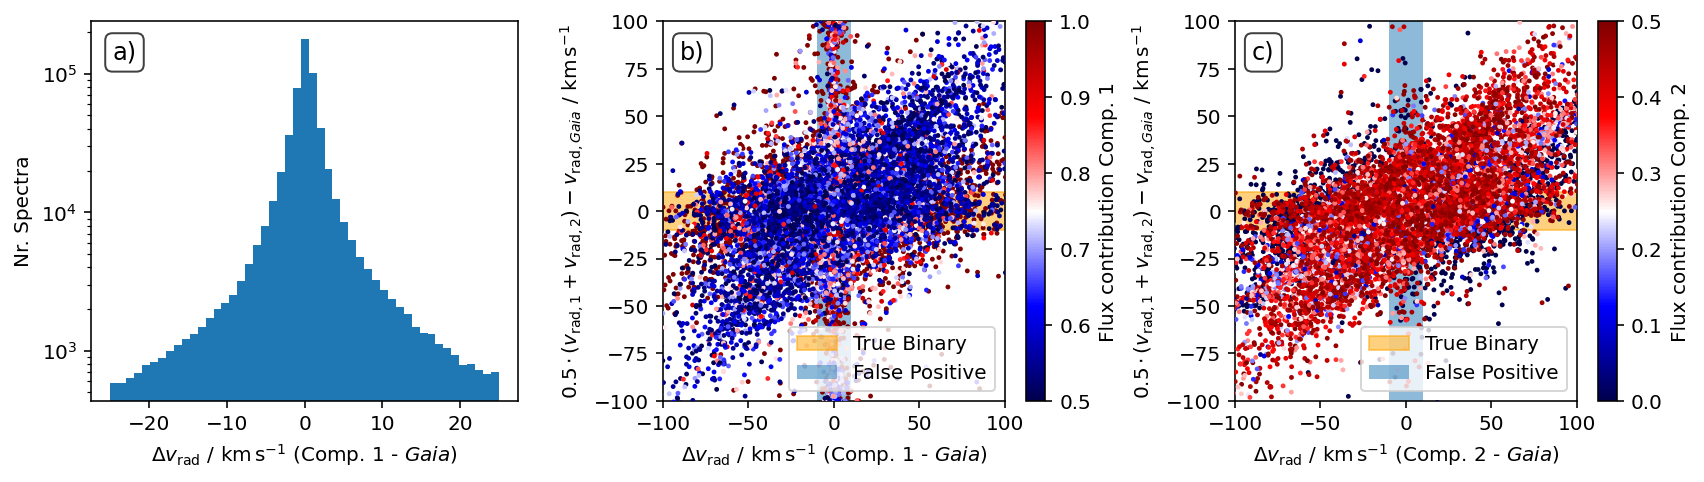

In [3]:
f, gs = plt.subplots(1,3,figsize=(12,3.5))

has_2_components = np.isfinite(galah_dr4_raw['rv_comp_2'])

ax = gs[0]
ax.text(0.05,0.9,'a)',ha='left',transform=ax.transAxes,fontsize=12,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75))
ax.set_xlabel(r'$\Delta v_\mathrm{rad}~/~\mathrm{km\,s^{-1}}$ (Comp. 1 - $Gaia$)')
ax.set_ylabel('Nr. Spectra')
ax.hist(
    galah_dr4_raw['rv_comp_1']-galah_dr4_raw['rv_gaia_dr3'],
    bins = np.linspace(-25,25,50)
)
ax.set_yscale('log')

ax = gs[1]
ax.text(0.05,0.9,'b)',ha='left',transform=ax.transAxes,fontsize=12,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75))
ax.set_xlabel(r'$\Delta v_\mathrm{rad}~/~\mathrm{km\,s^{-1}}$ (Comp. 1 - $Gaia$)')
ax.set_ylabel(r'$0.5\cdot(v_\mathrm{rad,1}+v_\mathrm{rad,2})-v_{\mathrm{rad},Gaia}~/~\mathrm{km\,s^{-1}}$')

ax.axhspan(-10,10,alpha=0.5,zorder=2,color='orange',label='True Binary')
ax.axvspan(-10,10,alpha=0.5,zorder=1,label='False Positive')
s = ax.scatter(
    galah_dr4_raw['rv_comp_1'][has_2_components]-galah_dr4_raw['rv_gaia_dr3'][has_2_components],
    0.5*(galah_dr4_raw['rv_comp_1'][has_2_components]+galah_dr4_raw['rv_comp_2'][has_2_components])-galah_dr4_raw['rv_gaia_dr3'][has_2_components],
    c = galah_dr4_raw['flux_contr'][has_2_components], s = 2, zorder=3, cmap='seismic'
)
cbar = plt.colorbar(s,ax=ax)
cbar.set_label('Flux contribution Comp. 1')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.legend(loc='lower right')

ax = gs[2]
ax.text(0.05,0.9,'c)',ha='left',transform=ax.transAxes,fontsize=12,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75))
ax.set_xlabel(r'$\Delta v_\mathrm{rad}~/~\mathrm{km\,s^{-1}}$ (Comp. 2 - $Gaia$)')
ax.set_ylabel(r'$0.5\cdot(v_\mathrm{rad,1}+v_\mathrm{rad,2})-v_{\mathrm{rad},Gaia}~/~\mathrm{km\,s^{-1}}$')

ax.axhspan(-10,10,alpha=0.5,zorder=2,color='orange',label='True Binary')
ax.axvspan(-10,10,alpha=0.5,zorder=1,label='False Positive')
s = ax.scatter(
    galah_dr4_raw['rv_comp_2'][has_2_components]-galah_dr4_raw['rv_gaia_dr3'][has_2_components],
    0.5*(galah_dr4_raw['rv_comp_1'][has_2_components]+galah_dr4_raw['rv_comp_2'][has_2_components])-galah_dr4_raw['rv_gaia_dr3'][has_2_components],
    c = 1-galah_dr4_raw['flux_contr'][has_2_components], s = 2, zorder=3, cmap='seismic'
)
cbar = plt.colorbar(s,ax=ax)
cbar.set_label('Flux contribution Comp. 2')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.legend(loc='lower right')

plt.tight_layout(w_pad=0)
plt.savefig('figures/vrad_comparison_comp1_comp2_gaiadr3.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()